The notebook contains some graph used in the section 1 of the analysis doumentation

In [1]:
import os
import sys
from pathlib import Path

lib_dir = Path("..") #folder cotainiing dir paysim_analysis
module_path = os.path.abspath(os.path.join(lib_dir))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from paysim_analysis.utils import get_project_folder

In [3]:
dir_ = get_project_folder().parent 
df = pd.read_csv(dir_ / "data/PS_20174392719_1491204439457_log.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


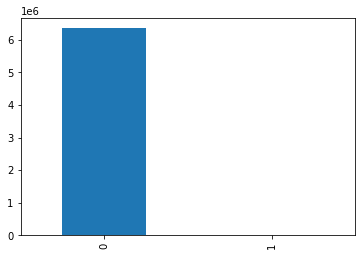

In [4]:
ax = df['isFraud'].value_counts().plot.bar()

In [5]:
frauds = df["isFraud"] == 1
total_size = frauds.count()
fraud_size = frauds.sum()
percentage = round(fraud_size/total_size, 4) 

print(f"number of transactions: {total_size}, number of fraudulent trans.: {fraud_size}, fraud percentage: {percentage}")
clients_involved_in_frauds = set(df[frauds]["nameOrig"])#.union(set(df[frauds & (df["type"]=="TRANSFER")]["nameDest"]))
fraud_perpetrators = set(df[frauds]["nameDest"])
all_clients = set(df["nameOrig"]).union(set(df[df["type"]=="TRANSFER"]["nameDest"]))
n_clients_involved_in_frauds = len(clients_involved_in_frauds)
n_all_clients = len(all_clients)
print(f"total unique clients: {n_all_clients}, unique clients involved in fraud: {n_clients_involved_in_frauds}, percentage: {n_clients_involved_in_frauds/ n_all_clients}")
print("number of fraud perpetrators ", len(fraud_perpetrators))


number of transactions: 6362620, number of fraudulent trans.: 8213, fraud percentage: 0.0013
total unique clients: 6589578, unique clients involved in fraud: 8213, percentage: 0.0012463620583897785
number of fraud perpetrators  8169


[]

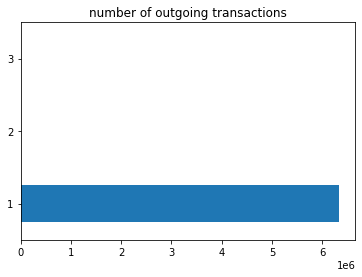

In [6]:
#number of outgoing transactions
out_degree_all = df['nameOrig'].value_counts(ascending=False)
pd.value_counts(out_degree_all.values, sort=True).plot.barh(title="number of outgoing transactions")
plt.plot()

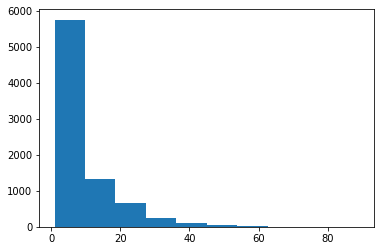

In [7]:
#number of inoming transactions of perpetrator accounts
inlinks_perpetrators = df[df['nameDest'].isin(fraud_perpetrators)]['nameDest'].value_counts(ascending=False)
plt.hist(inlinks_perpetrators.values)
plt.show()

11.083670715249662


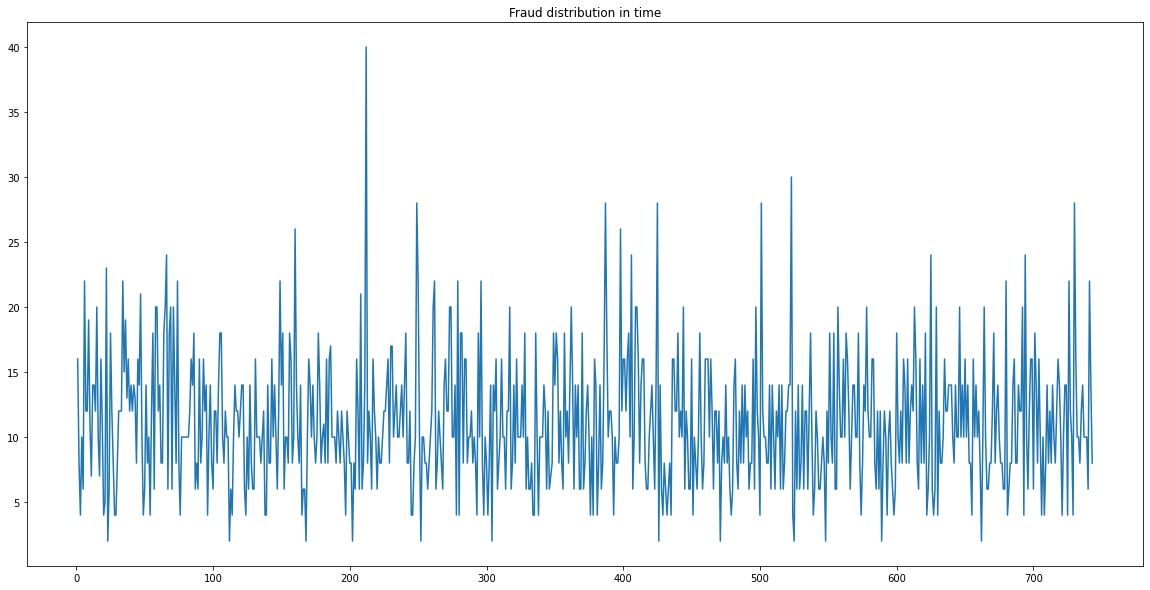

In [8]:
dist_hour = df[frauds]['step'].value_counts().sort_index()
print(dist_hour.mean())
dist_hour.plot(kind='line', figsize=(20,10), title="Fraud distribution in time")
plt.savefig(dir_ / "doc/imgs/frauds_distribution.png")

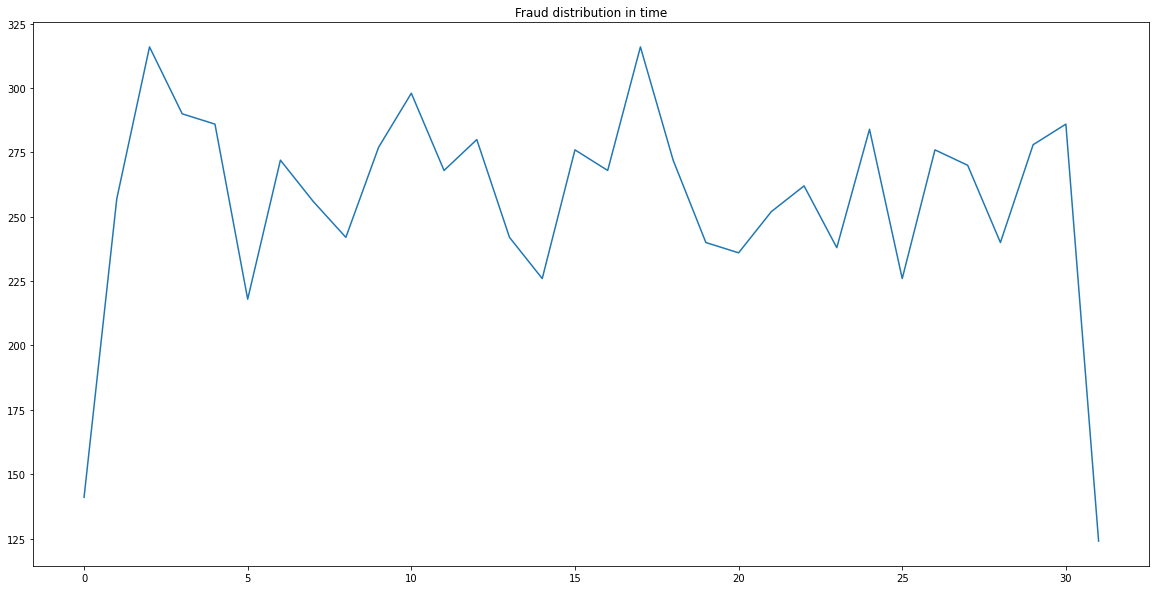

In [9]:
df["day"] = round(df['step']/24)
dist = df[frauds]['day'].value_counts().sort_index()
dist.plot(kind='line', figsize=(20,10), title="Fraud distribution in time")
plt.savefig(dir_ / "doc/imgs/frauds_distribution_days.png")